In [2]:
import os
import pathlib
import numpy as np
import pandas as dp
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import cv2
import PIL.Image as Image
import pathlib

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle-3.json ~/.kaggle

cp: cannot stat 'kaggle-3.json': No such file or directory


In [4]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0
 98% 215M/219M [00:01<00:00, 135MB/s]
100% 219M/219M [00:01<00:00, 118MB/s]


In [5]:
!unzip '/content/rice-image-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

In [6]:
direct="/content/Rice_Image_Dataset"
direct=pathlib.Path(direct)
direct

PosixPath('/content/Rice_Image_Dataset')

In [7]:
arborio = list(direct.glob('Arborio/*'))[:500]
basmati = list(direct.glob('Basmati/*'))[:500]
ipsala = list(direct.glob('Ipsala/*'))[:500]
jasmine = list(direct.glob('Jasmine/*'))[:500]
karacadag = list(direct.glob('Karacadag/*'))[:500]

In [8]:
rice_names = { 'arborio' : arborio, 'basmati' : basmati, 'ipsala' : ipsala, 'jasmine' : jasmine, 'karacadag': karacadag }

In [9]:
rice_index = { 'arborio' : 0, 'basmati' : 1, 'ipsala' : 2, 'jasmine' : 3, 'karacadag': 4 }

In [10]:
X, y = [], []
for index, images in rice_names.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(224,224))
    X.append(resized_img)
    y.append(rice_index[index])

In [11]:
img = cv2.imread(str(rice_names['arborio'][0]))
img.shape

(250, 250, 3)

In [12]:
X = np.array(X)
X = X/255
y = np.array(y)

In [13]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X,y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

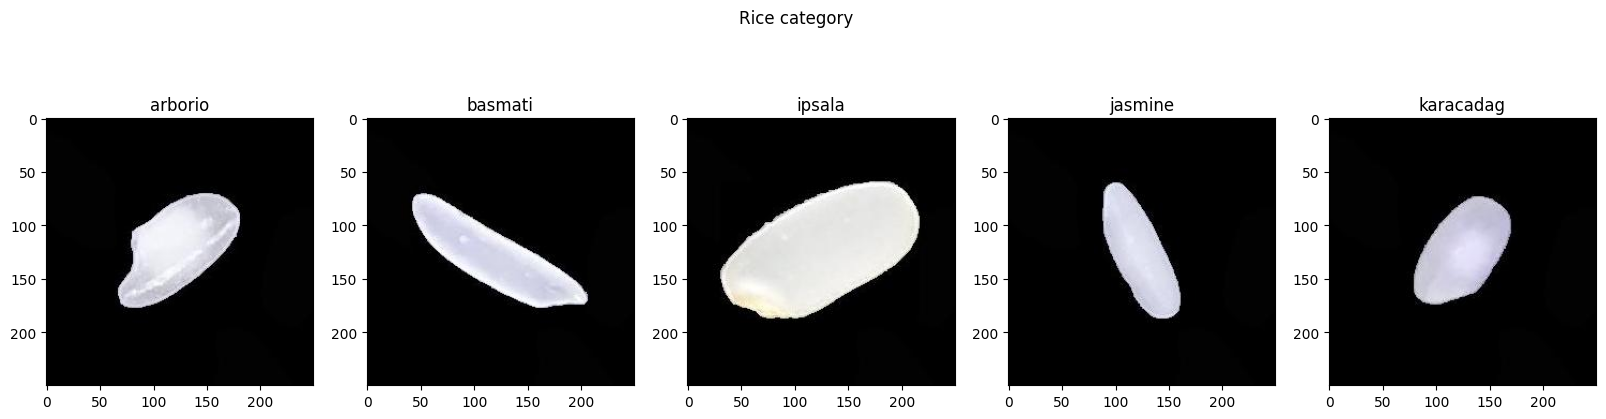

In [14]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice category')
arborio_image = plt.imread(arborio[0])
basmati_image = plt.imread(basmati[0])
ipsala_image = plt.imread(ipsala[0])
jasmine_image = plt.imread(jasmine[0])
karacadag_image = plt.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)


Pre-trained CNN Model

In [15]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
mobile_net = hub.KerasLayer(mobile_net, input_shape = (224,224,3), trainable=False)

In [16]:
num_names = 5
model = keras.Sequential([
    mobile_net,
    keras.layers.Dense(num_names)

])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [18]:
model.compile(
    optimizer = "adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [19]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
59/59 [==============================] - 13s 104ms/step - loss: 0.6412 - acc: 0.8229 - val_loss: 0.2351 - val_acc: 0.9554
Epoch 2/10
59/59 [==============================] - 3s 44ms/step - loss: 0.1858 - acc: 0.9648 - val_loss: 0.1659 - val_acc: 0.9682
Epoch 3/10
59/59 [==============================] - 3s 45ms/step - loss: 0.1252 - acc: 0.9787 - val_loss: 0.1378 - val_acc: 0.9618
Epoch 4/10
59/59 [==============================] - 3s 47ms/step - loss: 0.0969 - acc: 0.9819 - val_loss: 0.1146 - val_acc: 0.9618
Epoch 5/10
59/59 [==============================] - 3s 50ms/step - loss: 0.0809 - acc: 0.9856 - val_loss: 0.1187 - val_acc: 0.9618
Epoch 6/10
59/59 [==============================] - 3s 47ms/step - loss: 0.0688 - acc: 0.9861 - val_loss: 0.1097 - val_acc: 0.9618
Epoch 7/10
59/59 [==============================] - 3s 47ms/step - loss: 0.0614 - acc: 0.9877 - val_loss: 0.1114 - val_acc: 0.9618
Epoch 8/10
59/59 [==============================] - 3s 44ms/step - loss: 0.0538 -

In [20]:
model.evaluate(X_test,y_test)

15/15 [==============================] - 1s 98ms/step - loss: 0.0358 - acc: 0.9936


[0.03582857549190521, 0.9935897588729858]

In [21]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_bool))

8/8 [==============================] - 3s 60ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       0.99      0.99      0.99       102
           2       0.99      1.00      0.99        98
           3       0.99      0.98      0.98        89
           4       1.00      1.00      1.00        83

    accuracy                           0.99       468
   macro avg       0.99      0.99      0.99       468
weighted avg       0.99      0.99      0.99       468



In [22]:
from plotly .offline import iplot, init_notebook_mode
import plotly.express as px
import pandas as pd

init_notebook_mode(connected=True)

acc=pd.DataFrame({'train':history.history['acc'],'val':history.history['val_acc']})

fig = px.line(acc, x=acc.index, y=acc.columns[0::], title='Model Accuracy every epoch')
fig.show()

In [23]:
loss = pd.DataFrame({'train': history.history['loss'], 'val': history.history['val_loss']})

fig = px.line(loss, x=loss.index, y=loss.columns[0::], title='Training and Evaluation Loss every Epoch', markers=True)
fig.show()

In [24]:
X_test[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [25]:
X_test.shape

(468, 224, 224, 3)

In [26]:
a1 = cv2.imread("/content/Rice_Image_Dataset/Arborio/Arborio (10020).jpg")
a1 = cv2.resize(a1,(224,224))
a1 = np.array(a1)
a1 = a1/255
a1 = np.expand_dims(a1, 0)
pred = model.predict(a1)
pred = pred.argmax()
pred

1/1 [==============================] - 1s 791ms/step


0

In [27]:
for i, j in rice_index.items():
    if pred == j:
        print(i)

arborio


In [28]:
a2 = cv2.imread("/content/Rice_Image_Dataset/Jasmine/Jasmine (1000).jpg")
a2 = cv2.resize(a2,(224,224))
a2 = np.array(a2)
a2 = a2/255
a2 = np.expand_dims(a2, 0)
a2.shape

(1, 224, 224, 3)

In [29]:
pred2 = model.predict(a2)
pred2=pred2.argmax()
pred2

1/1 [==============================] - 0s 21ms/step


3

In [30]:
for i, j in rice_index.items():
    if pred2 == j:
        print(i)

jasmine


In [31]:
model.save("rice_classify.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [32]:
from google.colab import files
files.download('rice_classify.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>